<a href="https://colab.research.google.com/github/boy-johnny/fraud_data/blob/main/fraud_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第一步：讀取與探索你的資料 (10 分鐘)
我們直接從 Colab 的程式碼開始。請將 NPA_LineID.csv 上傳到 Colab，然後執行以下程式碼。

In [18]:
# --- 步驟 1: 匯入 pandas ---
import pandas as pd

# --- 步驟 2: 讀取 NPA_LineID.csv ---
df = pd.read_csv('../NPA_LineID.csv')

# --- 步驟 3: 重新命名欄位，使其更易於使用 ---
# 根據您的截圖，欄位應為「編號」、「LINE ID」、「通報日期」
df.rename(columns={
    '編號': 'serial_no',
    'LINE ID': 'line_id',
    '通報日期': 'report_date'
}, inplace=True)

# --- 步驟 4: 將 'report_date' 欄位轉換為真正的日期格式 ---
# 這是整個專案最關鍵的一步
df['report_date'] = pd.to_datetime(df['report_date'], errors='coerce')

# --- 步驟 5: 刪除日期轉換失敗或為空值的資料 ---
df.dropna(subset=['report_date'], inplace=True)

# --- 步驟 6: 確認成果 ---
print("清理與轉換後的資料資訊：")
df.info()
print("\n資料前五筆預覽：")
print(df.head())

清理與轉換後的資料資訊：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34493 entries, 0 to 34492
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   serial_no    34493 non-null  int64         
 1   帳號           34493 non-null  object        
 2   report_date  34493 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 808.6+ KB

資料前五筆預覽：
   serial_no       帳號 report_date
0          1   ayin68  2017-01-02
1          2   lai659  2017-01-02
2          3  qaq124b  2017-01-02
3          4  qwe7951  2017-01-02
4          5  wzy6666  2017-01-02


第二步：特徵工程 - 從日期中創造新欄位 (15 分鐘)
為了分析時間趨勢，我們需要從「日期」中提取出「年份」、「月份」、「星期幾」等新資訊。這在資料科學中稱為「特徵工程 (Feature Engineering)」。

In [19]:
# --- 步驟 7: 建立新的時間特徵欄位 ---
df['year'] = df['report_date'].dt.year
df['month'] = df['report_date'].dt.month
df['day_of_week'] = df['report_date'].dt.day_name()

# 為了方便後續按月份排序，我們建立一個年月欄位
df['year_month'] = df['report_date'].dt.to_period('M')


print("\n增加了年月特徵的資料預覽：")
df.head()


增加了年月特徵的資料預覽：


,serial_no,帳號,report_date,year,month,day_of_week,year_month
0,1,ayin68,2017-01-02,2017,1,Monday,2017-01
1,2,lai659,2017-01-02,2017,1,Monday,2017-01
2,3,qaq124b,2017-01-02,2017,1,Monday,2017-01
3,4,qwe7951,2017-01-02,2017,1,Monday,2017-01
4,5,wzy6666,2017-01-02,2017,1,Monday,2017-01


第三步：核心分析 - 時間趨勢統計 (15 分鐘)
現在我們來回答我們的核心問題。

In [20]:
# --- 步驟 8: 按「年月」分組，並計算每個月的通報數量 ---
monthly_counts = df.groupby('year_month').size()

print("各月份詐騙通報數量統計：")
print(monthly_counts.tail(12)) # 印出最近 12 個月的數據看看

# --- 步驟 9: 按「星期幾」分組，並計算每個星期的通報數量 ---
weekly_counts = df.groupby('day_of_week').size()

# 為了讓星期排序正確 (週一到週日)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_counts = weekly_counts.reindex(day_order)

print("\n各星期詐騙通報數量統計：")
print(weekly_counts)

各月份詐騙通報數量統計：
year_month
2024-05    1050
2024-06     980
2024-07    1102
2024-08    1164
2024-09     832
2024-10     983
2024-11     747
2024-12     406
2025-01     592
2025-02     551
2025-03     342
2025-04     422
Freq: M, dtype: int64

各星期詐騙通報數量統計：
day_of_week
Monday       7926
Tuesday      5265
Wednesday    5552
Thursday     6013
Friday       5042
Saturday     2626
Sunday       2069
dtype: int64


第四步：視覺化呈現 (15 分鐘)
為不同的分析目的，選用最適合的圖表。

In [26]:
# --- 步驟 10: 繪製每月通報數量的折線圖 ---
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# ---- 匯入中文字體 ----
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
plt.rc('font', family='Taipei Sans TC Beta')

--2025-06-21 13:04:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.99.101, 142.250.99.113, 142.250.99.100, ...
Connecting to drive.google.com (drive.google.com)|142.250.99.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-21 13:04:42--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.195.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2025-06-21 13:04:

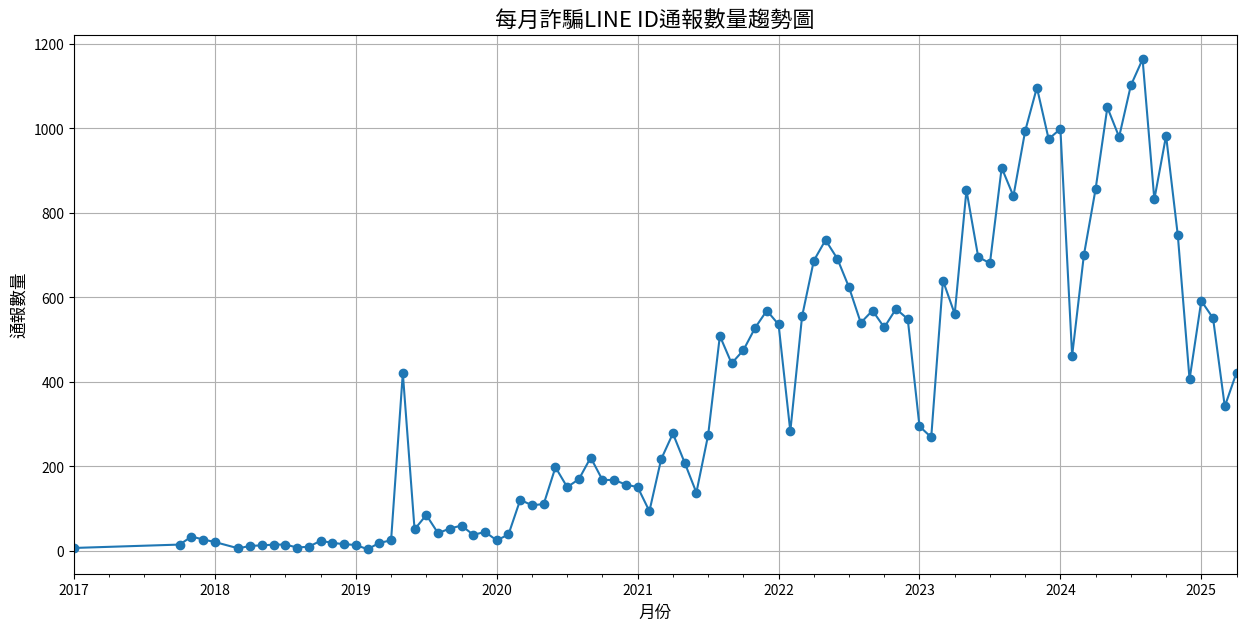

In [27]:
plt.figure(figsize=(15, 7))
monthly_counts.plot(kind='line', marker='o', linestyle='-')

plt.title('每月詐騙LINE ID通報數量趨勢圖', fontsize=16)
plt.xlabel('月份', fontsize=12)
plt.ylabel('通報數量', fontsize=12)
plt.grid(True) # 加入格線
plt.show()

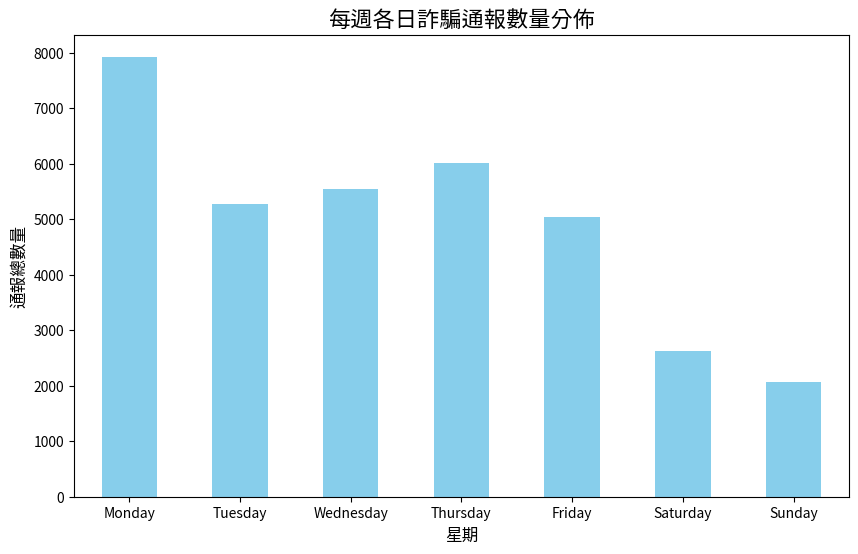

In [28]:
# --- 步驟 11: 繪製每週通報數量的長條圖 ---
plt.figure(figsize=(10, 6))
weekly_counts.plot(kind='bar', color='skyblue')

plt.title('每週各日詐騙通報數量分佈', fontsize=16)
plt.xlabel('星期', fontsize=12)
plt.ylabel('通報總數量', fontsize=12)
plt.xticks(rotation=0) # 標籤轉正
plt.show()